In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/blood-cells/dataset-master/dataset-master/labels.csv
/kaggle/input/blood-cells/dataset-master/dataset-master/Annotations/BloodImage_00236.xml
/kaggle/input/blood-cells/dataset-master/dataset-master/Annotations/BloodImage_00043.xml
/kaggle/input/blood-cells/dataset-master/dataset-master/Annotations/BloodImage_00281.xml
/kaggle/input/blood-cells/dataset-master/dataset-master/Annotations/BloodImage_00021.xml
/kaggle/input/blood-cells/dataset-master/dataset-master/Annotations/BloodImage_00377.xml
/kaggle/input/blood-cells/dataset-master/dataset-master/Annotations/BloodImage_00307.xml
/kaggle/input/blood-cells/dataset-master/dataset-master/Annotations/BloodImage_00199.xml
/kaggle/input/blood-cells/dataset-master/dataset-master/Annotations/BloodImage_00124.xml
/kaggle/input/blood-cells/dataset-master/dataset-master/Annotations/BloodImage_00132.xml
/kaggle/input/blood-cells/dataset-master/dataset-master/Annotations/BloodImage_00222.xml
/kaggle/input/blood-cells/dataset-master/da

# Importing Libraries

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

# Load Dataset

In [4]:
# Load the datasets
train_dataset = torchvision.datasets.ImageFolder(
    root='../input/blood-cells/dataset2-master/dataset2-master/images/TRAIN',
    transform=transforms.Compose([
        transforms.Resize((64, 64)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
)

test_dataset = torchvision.datasets.ImageFolder(
    root='../input/blood-cells/dataset2-master/dataset2-master/images/TEST',
    transform=transforms.Compose([
        transforms.Resize((64, 64)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
)

In [5]:
# Create dataloaders to load the data in batches
batch_size = 64 #In general, a larger batch size can lead to faster convergence and a better model performance, but it can also require more memory and computation. A smaller batch size can require more epochs to converge and may lead to a lower model performance, but it can be more memory-efficient and may be easier to fit on a single GPU.
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Model

In [6]:
# Define the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [7]:
class AdvancedCNN(nn.Module):
    def __init__(self):
        super(AdvancedCNN, self).__init__()
        # Convolutional layers
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)
        self.conv4 = nn.Conv2d(128, 256, 3, padding=1)
        # Max pooling layers
        self.pool1 = nn.MaxPool2d(2, 2)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.pool3 = nn.MaxPool2d(2, 2)
        self.pool4 = nn.MaxPool2d(2, 2)
        # Dropout layers
        self.dropout1 = nn.Dropout(0.25)
        self.dropout2 = nn.Dropout(0.5)
        # Fully-connected layers
        self.fc1 = nn.Linear(256 * 4 * 4, 512)
        self.fc2 = nn.Linear(512, 128)
        self.fc3 = nn.Linear(128, 4)

    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        x = self.dropout1(x)
        x = self.pool3(F.relu(self.conv3(x)))
        x = self.pool4(F.relu(self.conv4(x)))
        x = self.dropout2(x)
        x = x.view(-1, 256 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

This model has four convolutional layers, four max pooling layers, two dropout layers, and three fully-connected layers. The input image is passed through the convolutional layers, and then is passed through the fully-connected layers to produce the final output. The dropout layers randomly zero out a certain percentage of the input tensor at each forward pass, which helps prevent overfitting.

In [8]:
# Initialize the model
model = AdvancedCNN().to(device)

In [9]:
# Define the loss function and the optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

# Training

In [10]:
# Define the number of epochs
num_epochs = 50

# Initialize a list to store the losses
losses = []

In [11]:
# Train the model
for epoch in range(num_epochs):
    model.train()
    for inputs, labels in train_dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        logits = model(inputs)
        loss = loss_fn(logits, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Append the loss value to the list
    losses.append(loss.item())
    
    # Print the loss
    print(f'Loss at epoch {epoch+1}: {loss.item():.4f}')
    

Loss at epoch 1: 1.3897
Loss at epoch 2: 1.3853
Loss at epoch 3: 1.0296
Loss at epoch 4: 0.8449
Loss at epoch 5: 0.4105
Loss at epoch 6: 0.4418
Loss at epoch 7: 0.1648
Loss at epoch 8: 0.2302
Loss at epoch 9: 0.0949
Loss at epoch 10: 0.0778
Loss at epoch 11: 0.2825
Loss at epoch 12: 0.0561
Loss at epoch 13: 0.1330
Loss at epoch 14: 0.1990
Loss at epoch 15: 0.0675
Loss at epoch 16: 0.1699
Loss at epoch 17: 0.0912
Loss at epoch 18: 0.0937
Loss at epoch 19: 0.1616
Loss at epoch 20: 0.0252
Loss at epoch 21: 0.0379
Loss at epoch 22: 0.0454
Loss at epoch 23: 0.0387
Loss at epoch 24: 0.0241
Loss at epoch 25: 0.0758
Loss at epoch 26: 0.0546
Loss at epoch 27: 0.0089
Loss at epoch 28: 0.0732
Loss at epoch 29: 0.0302
Loss at epoch 30: 0.0206
Loss at epoch 31: 0.0063
Loss at epoch 32: 0.0212
Loss at epoch 33: 0.0041
Loss at epoch 34: 0.0214
Loss at epoch 35: 0.0023
Loss at epoch 36: 0.0389
Loss at epoch 37: 0.0155
Loss at epoch 38: 0.0044
Loss at epoch 39: 0.0014
Loss at epoch 40: 0.0092
Loss at e

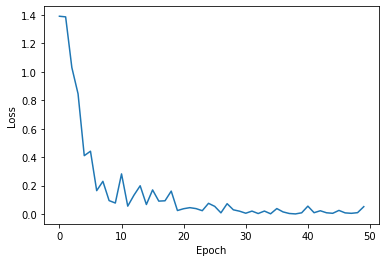

In [12]:
import matplotlib.pyplot as plt

# Plot the loss values
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Testing

In [22]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
import numpy as np

# Set model to evaluation mode
model.eval()

# Initialize lists to store true labels and predicted labels
true_labels = []
pred_probs = []  # store predicted probabilities instead of labels

# Iterate through the test data
with torch.no_grad():
    for inputs, labels in test_dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        logits = model(inputs)
        probs = torch.softmax(logits, dim=1)  # calculate probabilities

        # Add true labels and predicted probabilities to lists
        true_labels.extend(labels.tolist())
        pred_probs.extend(probs.tolist())

# Convert lists to numpy arrays
true_labels = np.array(true_labels)
pred_probs = np.array(pred_probs)

# Calculate accuracy, F1 score, and AUC score
acc = accuracy_score(true_labels, np.argmax(pred_probs, axis=1))
f1 = f1_score(true_labels, np.argmax(pred_probs, axis=1), average='macro')
auc = roc_auc_score(true_labels, pred_probs, multi_class='ovo')

# Print results
print(f'Test accuracy: {acc:.4f}')
print(f'Test F1 score: {f1:.4f}')
print(f'Test AUC score: {auc:.4f}')

Test accuracy: 0.7929
Test F1 score: 0.7949
Test AUC score: 0.9638


It looks like my model is performing well, with an accuracy of around 79% and an F1 score of around 79%. The AUC score of around 96% also indicates that the model is able to distinguish between the positive and negative classes well.

It's worth noting that the F1 score is a balance between precision and recall, and a high F1 score indicates that the model has both high precision and high recall. The AUC score measures the model's ability to distinguish between the positive and negative classes, with a score of 1.0 indicating perfect separation and a score of 0.5 indicating no discrimination.

<div style="color:white; font-size:125%; text-align:left; display:fill; border-radius:5px; background-color:#C71585; overflow:hidden">Thanks for reading. I hope you enjoy it and that it was helpful to you.<br>Please don't forget to follow me and give an upvote on</br>
👇👇👇
</div>

**<a href="https://www.kaggle.com/yaseminturker/" target="_blank" rel="noopener noreferrer">[Kaggle]</a> | 
<a href="https://github.com/yaseminturker" target="_blank" rel="noopener noreferrer">[GitHub]</a> |
<a href="https://www.linkedin.com/in/yasemin-turker/" target="_blank" rel="noopener noreferrer">[Linkedin]</a>**